In [11]:
!pip install pandas numpy scikit-learn scipy plotly dash

In [12]:
import pandas as pd
import numpy as np

drink_data = {
    'Class': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    'Drink': ['Coke', 'Pepsi', 'Sprite', '7Up', 'Cappuccino', 'Espresso', 'Latte', 'Mocha'],
    'Rank': [8, 7, 6, 5, 4, 3, 2, 1],
    'Amount_mu': [100, 200, 200, 400, 700, 700, 800, 900],
    'Amount_sigma': [200, 10, 10, 100, 10, 10, 300, 400],
    'Quantity_min': [500, 500, 500, 500, 1, 1, 1, 1],
    'Quantity_max': [1000, 1000, 1000, 1000, 500, 500, 500, 500],
    'Count': [100, 200, 100, 400, 400, 200, 100, 100]
}
df_info = pd.DataFrame(drink_data)
print(df_info)

  Class       Drink  Rank  Amount_mu  Amount_sigma  Quantity_min  \
0     A        Coke     8        100           200           500   
1     B       Pepsi     7        200            10           500   
2     C      Sprite     6        200            10           500   
3     D         7Up     5        400           100           500   
4     E  Cappuccino     4        700            10             1   
5     F    Espresso     3        700            10             1   
6     G       Latte     2        800           300             1   
7     H       Mocha     1        900           400             1   

   Quantity_max  Count  
0          1000    100  
1          1000    200  
2          1000    100  
3          1000    400  
4           500    400  
5           500    200  
6           500    100  
7           500    100  


In [13]:
np.random.seed(42) # for reproducibility

generated_data = []
for index, row in df_info.iterrows():
    n_samples = row['Count']

    # Generate 'Amount' based on Normal Distribution
    amounts = np.random.normal(row['Amount_mu'], row['Amount_sigma'], n_samples)

    # Generate 'Quantity' based on Random Uniform Distribution
    quantities = np.random.uniform(row['Quantity_min'], row['Quantity_max'], n_samples)

    for i in range(n_samples):
        generated_data.append({
            'Class': row['Class'],
            'Drink': row['Drink'],
            'Rank': row['Rank'],
            'Amount': amounts[i],
            'Quantity': quantities[i]
        })

df = pd.DataFrame(generated_data)
print("\nGenerated Dataset Head:")
print(df.head())
print("\nGenerated Dataset Info:")
df.info()


Generated Dataset Head:
  Class Drink  Rank      Amount    Quantity
0     A  Coke     8  199.342831  708.705502
1     A  Coke     8   72.347140  611.053905
2     A  Coke     8  229.537708  559.932684
3     A  Coke     8  404.605971  668.807586
4     A  Coke     8   53.169325  971.454852

Generated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Class     1600 non-null   object 
 1   Drink     1600 non-null   object 
 2   Rank      1600 non-null   int64  
 3   Amount    1600 non-null   float64
 4   Quantity  1600 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 62.6+ KB


In [14]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Rank', 'Amount', 'Quantity']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nNormalized Data Head:")
print(df.head())


Normalized Data Head:
  Class Drink  Rank    Amount  Quantity
0     A  Coke   1.0  0.292782  0.708494
1     A  Coke   1.0  0.233128  0.610725
2     A  Coke   1.0  0.306966  0.559542
3     A  Coke   1.0  0.389202  0.668548
4     A  Coke   1.0  0.224119  0.971562


In [15]:
df_onehot = pd.get_dummies(df, columns=['Drink'], prefix='Drink')
print("\nDataFrame with One-Hot Encoding Head:")
print(df_onehot.head())


DataFrame with One-Hot Encoding Head:
  Class  Rank    Amount  Quantity  Drink_7Up  Drink_Cappuccino  Drink_Coke  \
0     A   1.0  0.292782  0.708494      False             False        True   
1     A   1.0  0.233128  0.610725      False             False        True   
2     A   1.0  0.306966  0.559542      False             False        True   
3     A   1.0  0.389202  0.668548      False             False        True   
4     A   1.0  0.224119  0.971562      False             False        True   

   Drink_Espresso  Drink_Latte  Drink_Mocha  Drink_Pepsi  Drink_Sprite  
0           False        False        False        False         False  
1           False        False        False        False         False  
2           False        False        False        False         False  
3           False        False        False        False         False  
4           False        False        False        False         False  


In [16]:
features_onehot = df_onehot.drop('Class', axis=1)

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne_onehot = TSNE(n_components=2, random_state=42, perplexity=30) # Perplexity is a common parameter to tune
tsne_results_onehot = tsne_onehot.fit_transform(features_onehot)

df_tsne_onehot = pd.DataFrame(tsne_results_onehot, columns=['TSNE1', 'TSNE2'])
df_tsne_onehot['Class'] = df['Class']
df_tsne_onehot['Drink'] = df['Drink'] # Keep 'Drink' for plotting/analysis

print("\nt-SNE Results (1-of-k) Head:")
print(df_tsne_onehot.head())


t-SNE Results (1-of-k) Head:
      TSNE1      TSNE2 Class Drink
0 -2.109120 -23.362305     A  Coke
1 -3.654815 -25.557674     A  Coke
2 -2.451034 -26.361231     A  Coke
3 -1.172605 -24.325760     A  Coke
4 -1.199491 -17.437609     A  Coke


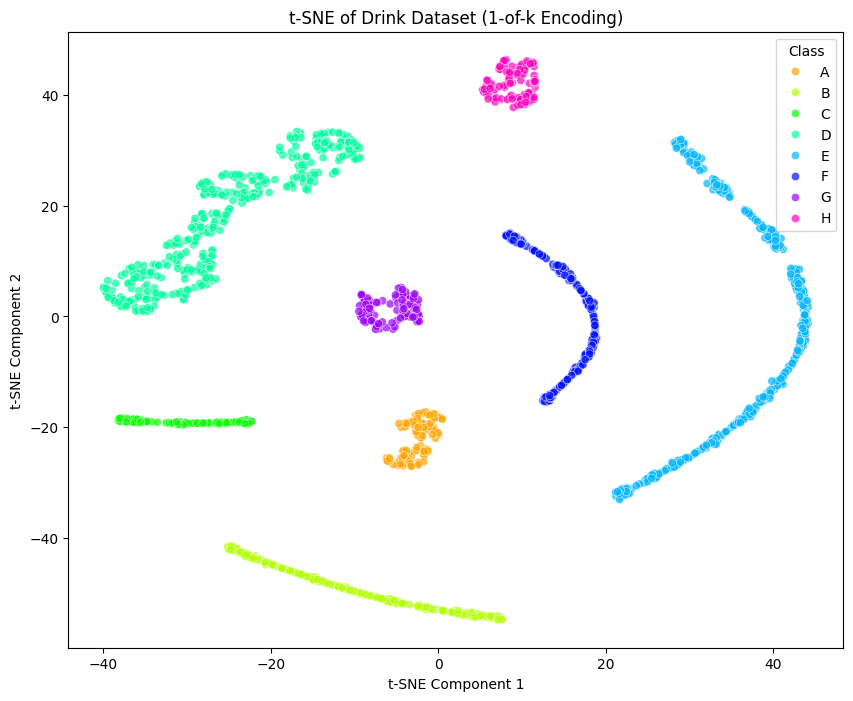

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="TSNE1", y="TSNE2",
    hue="Class",
    palette=sns.color_palette("hsv", df_tsne_onehot['Class'].nunique()),
    data=df_tsne_onehot,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE of Drink Dataset (1-of-k Encoding)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [19]:
drink_categories = {
    'Coke': 'Carbonated',
    'Pepsi': 'Carbonated',
    'Sprite': 'Carbonated',
    '7Up': 'Carbonated',
    'Cappuccino': 'Coffee',
    'Espresso': 'Coffee',
    'Latte': 'Coffee',
    'Mocha': 'Coffee'
}

# Create a mapping for custom dissimilarities
drink_dissimilarity_map = {}
for d1 in df_info['Drink']:
    for d2 in df_info['Drink']:
        if drink_categories[d1] == drink_categories[d2]:
            drink_dissimilarity_map[(d1, d2)] = 2
        else:
            drink_dissimilarity_map[(d1, d2)] = 4

# Dissimilarity of an item with itself is 0
for d in df_info['Drink']:
    drink_dissimilarity_map[(d, d)] = 0

print("\nSample Drink Dissimilarities:")
print(f"Coke vs Pepsi: {drink_dissimilarity_map[('Coke', 'Pepsi')]}")
print(f"Coke vs Cappuccino: {drink_dissimilarity_map[('Coke', 'Cappuccino')]}")


Sample Drink Dissimilarities:
Coke vs Pepsi: 1
Coke vs Cappuccino: 4


In [20]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform

# Extract numerical features for distance calculation
numerical_features_scaled = df[numerical_cols].values

# Calculate Euclidean distances for numerical features
numerical_distances = squareform(pdist(numerical_features_scaled, 'euclidean'))

# Create a dissimilarity matrix for 'Drink' column based on our custom map
n_samples = len(df)
drink_dissimilarity_matrix = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(n_samples):
        drink1 = df.iloc[i]['Drink']
        drink2 = df.iloc[j]['Drink']
        drink_dissimilarity_matrix[i, j] = drink_dissimilarity_map[(drink1, drink2)]

# Combine distances (you might need to tune the weighting factor)
# A simple approach: add them directly. You could also scale the nominal dissimilarity.
# For example, scale nominal dissimilarity to be in a similar range as numerical distances.
# Let's try scaling by the max numerical distance to keep it somewhat proportional.
max_num_dist = np.max(numerical_distances)
# Adjust scale_factor as needed to give more or less weight to nominal dissimilarity
scale_factor = 10.0 # Example: nominal dissimilarity contributes up to half of max numerical distance
scaled_drink_dissimilarity_matrix = drink_dissimilarity_matrix * (max_num_dist / np.max(drink_dissimilarity_matrix)) * scale_factor

combined_dissimilarity_matrix = numerical_distances + scaled_drink_dissimilarity_matrix

print("\nCombined Dissimilarity Matrix Shape:", combined_dissimilarity_matrix.shape)


Combined Dissimilarity Matrix Shape: (1600, 1600)


In [21]:
tsne_custom_dissimilarity = TSNE(n_components=2, random_state=42, perplexity=30, metric='precomputed', init='random') # 修正：將 init 設為 'random'
tsne_results_custom = tsne_custom_dissimilarity.fit_transform(combined_dissimilarity_matrix)

df_tsne_custom = pd.DataFrame(tsne_results_custom, columns=['TSNE1', 'TSNE2'])
df_tsne_custom['Class'] = df['Class']
df_tsne_custom['Drink'] = df['Drink'] # Keep 'Drink' for plotting/analysis

print("\nt-SNE Results (Custom Dissimilarity) Head:")
print(df_tsne_custom.head())


t-SNE Results (Custom Dissimilarity) Head:
       TSNE1      TSNE2 Class Drink
0 -24.541544 -21.758801     A  Coke
1 -25.275978 -24.466761     A  Coke
2 -23.887383 -24.799992     A  Coke
3 -23.591564 -22.505394     A  Coke
4 -24.026941 -15.590856     A  Coke


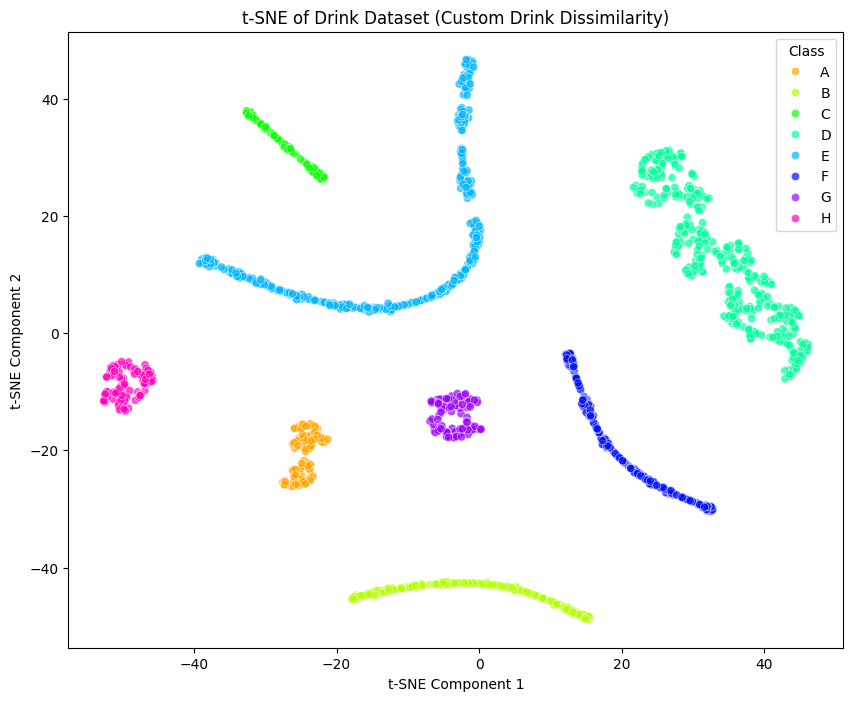

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="TSNE1", y="TSNE2",
    hue="Class",
    palette=sns.color_palette("hsv", df_tsne_custom['Class'].nunique()),
    data=df_tsne_custom,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE of Drink Dataset (Custom Drink Dissimilarity)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [23]:
!pip install jupyter_dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.5 MB/s eta 0:00:00


In [24]:
import plotly.express as px

# 將原始（已正規化）的 Rank, Amount, Quantity 欄位複製到 df_tsne_custom
df_tsne_custom['Rank'] = df['Rank']
df_tsne_custom['Amount'] = df['Amount']
df_tsne_custom['Quantity'] = df['Quantity']

fig_interactive = px.scatter(
    df_tsne_custom,
    x="TSNE1",
    y="TSNE2",
    color="Class",
    hover_data=['Drink', 'Rank', 'Amount', 'Quantity'], # 顯示原始 (已正規化) 值
    title='Interactive t-SNE of Drink Dataset (Custom Dissimilarity) with Hover'
)
fig_interactive.show()

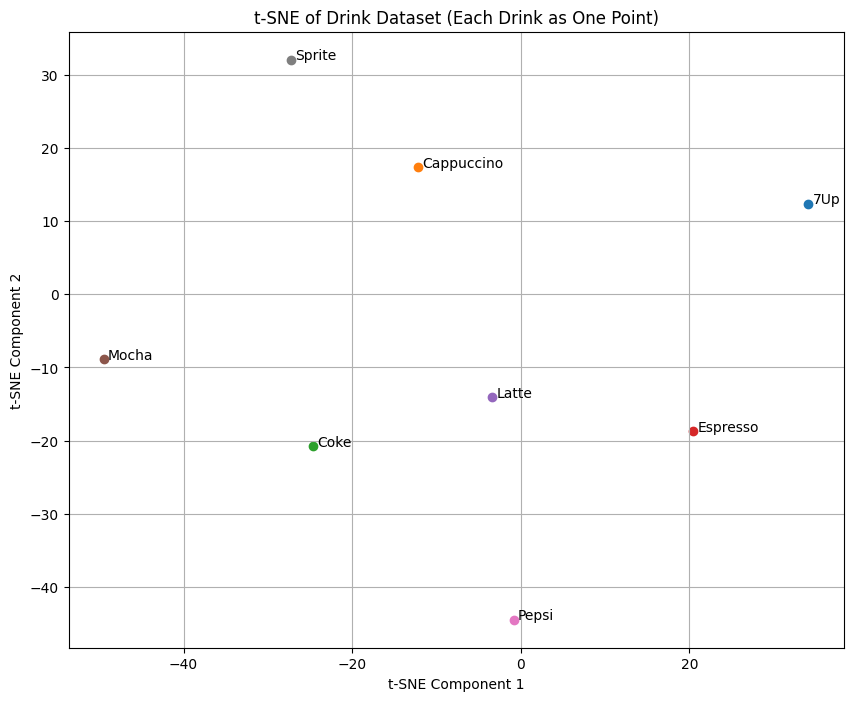

In [25]:
import matplotlib.pyplot as plt

# 將 t-SNE 結果依照 Drink 分群取平均座標
df_centroids = df_tsne_custom.groupby("Drink")[["TSNE1", "TSNE2"]].mean().reset_index()

# 畫圖，每個類別畫一個點
plt.figure(figsize=(10, 8))
for i, row in df_centroids.iterrows():
    plt.scatter(row["TSNE1"], row["TSNE2"])
    plt.text(row["TSNE1"] + 0.5, row["TSNE2"], row["Drink"], fontsize=10)

plt.title("t-SNE of Drink Dataset (Custom Drink Dissimilarity)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

In [26]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output, State
import plotly.express as px

# 假設 df_tsne_custom 已經在之前的步驟中定義並包含了所需的欄位
# 如果沒有，請確保在運行此代碼塊之前執行以下行：
# df_tsne_custom['Rank'] = df['Rank']
# df_tsne_custom['Amount'] = df['Amount']
# df_tsne_custom['Quantity'] = df['Quantity']

app = Dash(__name__) # 修正：移除 jupyter_mode 參數

app.layout = html.Div([
    html.H1("t-SNE Interactive Data Selection"),
    html.Div([
        dcc.Graph(
            id='tsne-plot',
            figure=px.scatter(
                df_tsne_custom,
                x="TSNE1",
                y="TSNE2",
                color="Class",
                hover_data=['Drink', 'Rank', 'Amount', 'Quantity'],
                title='Interactive t-SNE with Lasso/Box Select'
            )
        ),
    ]),
    html.Div(id='selected-data-output'),
    html.H2("Selected Data Details"),
    html.Pre(id='selected-data-table', style={'overflowX': 'scroll', 'whiteSpace': 'pre-wrap', 'wordBreak': 'break-all'})
])

@app.callback(
    Output('selected-data-output', 'children'),
    Output('selected-data-table', 'children'),
    Input('tsne-plot', 'selectedData')
)
def display_selected_data(selectedData):
    if selectedData is None:
        return "No data selected.", "Select points on the graph to see their details."

    points = selectedData['points']
    selected_indices = [point['pointIndex'] for point in points]

    selected_df_tsne = df_tsne_custom.iloc[selected_indices]
    selected_original_df = df.iloc[selected_indices] # Original (normalized) features

    output_text = f"Selected {len(selected_indices)} points."
    selected_table_str = selected_original_df.to_string()

    return output_text, selected_table_str

# Run the app in a Colab output cell
# mode='inline' 參數應該放在 run 這裡
app.run(mode='inline', port=8050) # 修正：將 run_server 改為 run

<IPython.core.display.Javascript object>